In [1]:
import numpy as np
from collections import Counter
from itertools import permutations 
import matplotlib.pyplot as plt


#Read from txt files 
X = np.loadtxt("emails.csv", delimiter="," ,skiprows=1 ,usecols=range(1,3001), dtype=np.float32)
y = np.loadtxt("emails.csv",delimiter="," ,skiprows=1 , usecols=range(3001,3002), dtype=np.float32)




In [53]:
### KNN 
from sklearn.metrics import accuracy_score

def distance (point,X,K): 
    dist =[]
    #print(point)

    for i in range(len(X[:,0])):
        init_dist = np.linalg.norm(point-X[i,:])
        #print(init_dist)
        #for f in range(3000): 
         #   init_dist += (point[f]-X[i,f])**2
        dist.append(init_dist)
    #loc = np.where(dist == np.amin(dist))
    loc = np.argsort(dist)
    x = loc[:K]
    #if len(x)>1: x = x[0]
    return x

def predict(y,loc_min,K): 
    tot = np.sum(y[loc_min])
    if tot > K/2: 
        y = 1 
    else :
        y = 0 
    return y

def conf_knn(y,loc_min,K): 
    tot = np.sum(y[loc_min])
    return tot/K

In [54]:
## cross validiation ~ k = 5 fold 

avg_acc =[]
K =[5] 
for m in range(1): 
    acc=[]
    pres=[]
    recall=[]
    for k in range(1): 
        TP =0
        # single training 
        X_test = X[(k+1)*4000:,:]
        y_test = y[(k+1)*4000:]
        #X_train = np.delete(X, [k*1000,(k+1)*999], 0)
        #X_train = np.delete(X, [k*1000:(k+1)*1000], 0)
        #indices = np.r_[ k*1000:(k+1)*1000:1]
        X_train = X[0:4000,:]
        y_train = y[0:4000]
        y_pred_5NN = np.zeros(1000)
        y_conf_5NN = np.zeros(1000)

        #print(len(X_test[:,0]))
        #print(len(y_pred))
        #print(len(X_train[:,0]))
        for s in range(len(X_test[:,0])):
            #print(X_test[k,:])
            loc = distance(X_test[s,:],X_train,K[m])
            #print(loc)
            y_pred_5NN[s]=predict(y_train,loc,K[m])
            y_conf_5NN[s]=conf_knn(y_train,loc,K[m])

            #print(y_pred)
        accuracy_score(y_pred_5NN, y_test)
        acc.append(accuracy_score(y_pred_5NN, y_test))
        for t in range(1000):
            if y_pred_5NN[t]==y_test[t] and y_pred_5NN[t]>0:
                TP+=1
        #TP= np.count_nonzero(y_pred==y_test )
        pres.append(TP/np.count_nonzero(y_pred_5NN==1))
        recall.append(TP/np.count_nonzero(y_test==1))
        print('Accuracy: ',acc[k])

        print('prescion: ',pres[k])
        print('recall: ',recall[k])

    print("Avg. Accuracy",np.mean(acc))
    avg_acc.append(np.mean(acc))

Accuracy:  0.78
prescion:  0.6155913978494624
recall:  0.7483660130718954
Avg. Accuracy 0.78


In [49]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

  

# model construction  
class LogitRegression() :
    def __init__( self, alpha, itr ) :        
        self.alpha = alpha        
        self.itr = itr
          
    #  training    
    def fit( self, X, y ) :        
        # training_samples by features        
        self.m, self.n = X.shape        
        # weight initialization        
        self.theta = np.zeros( self.n )        
        self.X = X        
        self.y = y
          
        # gradient descent
                  
        for i in range( self.itr ) :            
            self.update()            
        return self
      
    #  update weights 
      
    def update( self ) :           
        sig = 1 / ( 1 + np.exp( - ( self.X.dot( self.theta )  ) ) )
          
        #  gradients        
        B = ( sig - self.y.T )        
        B = np.reshape( B, self.m )        
        dtheta = np.dot( self.X.T, B ) / self.m         
          
        # update weights    
        self.theta = self.theta - self.alpha * dtheta    
          
        return self
      
      
    def predict( self, X ) :    
        sig_pred = 1 / ( 1 + np.exp( - ( X.dot( self.theta )  ) ) )        
        y_pred_log = np.where( sig_pred > 0.5, 1, 0 )        
        return y_pred_log

    def conf_log( self, X ) :    
        sig_pred = 1 / ( 1 + np.exp( - ( X.dot( self.theta )  ) ) )        
        #y_pred_log = np.where( sig_pred > 0.5, 1, 0 )        
        return sig_pred
  
  
def main() :
      
    
    acc=[]
    pres=[]
    recall=[]
    for k in range(1): 
        TP =0
        #X_test = X[k*1000:(k+1)*1000,:]
        #y_test = y[k*1000:(k+1)*1000]
        #X_train = np.delete(X, [k*1000,(k+1)*999], 0)
        #X_train = np.delete(X, [k*1000:(k+1)*1000], 0)
        #indices = np.r_[ k*1000:(k+1)*1000:1]
        #X_train = np.delete(X, indices, 0)
        #y_train = np.delete(y, indices, 0)
        y_pred_log = np.zeros(1000)
        #print(len(X_test[:,0]))
        #print(len(y_pred))
        #print(len(X_train[:,0]))
        model = LogitRegression( alpha = 0.01, itr = 1000 )
      
        model.fit( X_train, y_train )  
        y_pred_log = model.predict( X_test )    
        y_conf_log = model.conf_log( X_test )    

        accuracy_score(y_pred_log, y_test)
        acc.append(accuracy_score(y_pred_log, y_test))
        for t in range(1000):
            if y_pred_log[t]==y_test[t] and y_pred_log[t]>0:
                TP+=1
        #TP= np.count_nonzero(y_pred==y_test )
        pres.append(TP/np.count_nonzero(y_pred_log==1))
        recall.append(TP/np.count_nonzero(y_test==1))
        print('prescion: ',pres[k])
        print('recall: ',recall[k])

    print("Avg. Accuracy",np.mean(acc)) 
    # Splitting dataset into train and test set
    return y_conf_log
  
  
if __name__ == "__main__" :     
    y_conf_log =main()


<ipython-input-49-5fc4e32cb73d>:31: RuntimeWarning: overflow encountered in exp
  sig = 1 / ( 1 + np.exp( - ( self.X.dot( self.theta )  ) ) )


prescion:  0.79182156133829
recall:  0.696078431372549
Avg. Accuracy 0.851


In [55]:
#arr2D[arr2D[:,columnIndex].argsort()]

A = (np.vstack((y_conf_5NN,y_test))).T

#sortedA = A[A[:,0].argsort(-1)]
sortedAKNN = np.array(sorted(A, key= lambda x: -x[0]))
print(sortedAKNN)

B = (np.vstack((y_conf_log,y_test))).T
sortedAlog = np.array(sorted(B, key= lambda x: -x[0]))
print(sortedAlog)


[[1. 1.]
 [1. 1.]
 [1. 1.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[1.00000000e+000 1.00000000e+000]
 [1.00000000e+000 1.00000000e+000]
 [1.00000000e+000 1.00000000e+000]
 ...
 [9.17229568e-130 0.00000000e+000]
 [6.01001406e-155 0.00000000e+000]
 [1.51839271e-174 0.00000000e+000]]


In [56]:
TPR = 0
FPR = 0 
TP = 0 
FP = 0 
last_TP = 0 
x_knn =[]
Y_knn =[]
Class = sortedAKNN[:,1]
print(Class)
for i in range(len(Class)): 
    if i>1 and Class[i] != Class[i-1] and Class[i] ==0 and TP > last_TP :
        TPR = TP/np.sum(Class)
        FPR = FP/(len(Class) - np.sum(Class))
        print('( %s , %s )' % (TPR,FPR))
        last_TP = TP
        x_knn.append(TPR)
        Y_knn.append(FPR)
        #if TPR ==1: 
        #    print(Conf[i])
    if Class[i] ==1: 
        TP +=1 
    else: 
        FP +=1 
TPR = TP/np.sum(Class)
FPR = FP/(len(Class) - np.sum(Class))
print('( %s , %s )' % (TPR,FPR))
x_knn.append(TPR)
Y_knn.append(FPR)



TPR = 0
FPR = 0 
TP = 0 
FP = 0 
last_TP = 0 
x_log =[]
Y_log =[]
Class = sortedAlog[:,1]
print(Class)
for i in range(len(Class)): 
    if i>1 and Class[i] != Class[i-1] and Class[i] ==0 and TP > last_TP :
        TPR = TP/np.sum(Class)
        FPR = FP/(len(Class) - np.sum(Class))
        print('( %s , %s )' % (TPR,FPR))
        last_TP = TP
        x_log.append(TPR)
        Y_log.append(FPR)
        #if TPR ==1: 
        #    print(Conf[i])
    if Class[i] ==1: 
        TP +=1 
    else: 
        FP +=1 
TPR = TP/np.sum(Class)
FPR = FP/(len(Class) - np.sum(Class))
print('( %s , %s )' % (TPR,FPR))
x_log.append(TPR)
Y_log.append(FPR)

[1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0.
 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.

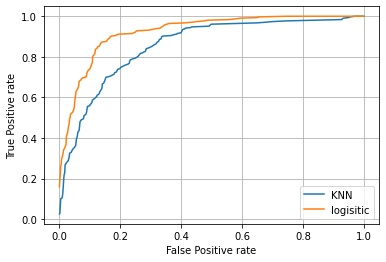

In [60]:
fig,ax = plt.subplots()    
plt.plot(Y_knn,x_knn,label='KNN')
#plt.scatter(Y_knn,x_knn,c='r')
plt.plot(Y_log,x_log,label='logisitic')
#plt.scatter(Y_log,x_log,c='g')
plt.legend()
plt.grid()
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.savefig("ROC_emails.jpg",dpi=400)

In [29]:
X1 = np.linspace(0.0, 1.0, num=101, retstep=False)
Count1 = ((0.55 <= X1) & (X1 <= 0.65)).sum() -1 
perct = Count1/101
print(perct)


0.09900990099009901


Text(0, 0.5, 'Length of hypercube')

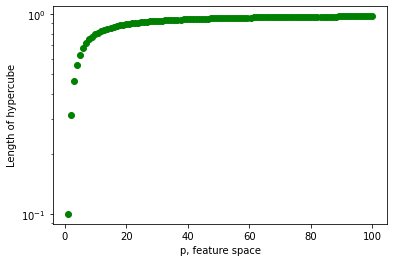

In [46]:
X1 = np.linspace(1.0, 100.0, num=101, retstep=False)
X2 = 0.1**(1/X1)
fig,ax = plt.subplots()    

plt.scatter(X1,X2,c='g')
plt.yscale('log')
plt.xlabel('p, feature space')
plt.ylabel('Length of hypercube')